**Instituto de Informática - UFG**

**Course: Information Visualization 2020/1**

**Professor: Hugo Alexandre Dantas do Nascimento**

**Students: Maurício Rodrigues Lima, Ruan Chaves Rodrigues e Victor Alexandre de Carvalho Coelho**

#Practical Assignment I – Building Visualizations


**Description:** Consider the above data table of people who were assisted in a health care center. For each person, there is a line with the following attributes: name, age, height, weight, gender, city and home neighborhood, as well as the type of complaint (symptom category presented). There are about 49 records in the table. 


Please, do the following: 


1. Define questions to be answered by your visualization. 

2. Choose a visualization tool that enables you to visualize the data. After that, create convert the table to a suitable database (containing the rows with attributes described above) and build one or more visualizations. Do the necessary adjustments until it matches your need.  

3. Describe, through a message in this forum, the following items: 

    a. The name(s) of the employedt echnique(s) and visualization tool(s).

    b. The visual mapping applied. 

    c. An illustrative picture of the visualization(s).

    d. Ways of interacting with the visualizations, if any.  

    e. An explanation demonstrating if the visualization(s) is(are) effective to answer the questions.

#1) Data investigation


### Before doing the assignment let's make an investigation in our dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
!ls

pacients-1.csv	sample_data


In [ ]:
#Carregando o DataSet
original_data = pd.read_csv('pacients-1.csv', sep=',')

In [ ]:
original_data.shape

(49, 8)

### Here we have our original data set

In [ ]:
print(original_data.to_string())

                    NOME  IDADE  ALTURA  PESO SEXO                  CIDADE               BAIRRO CATEGORIA-SINTOMA
0          Pedro Menezes     15      67    43    M                 Goiânia            Setor Sul                 C
1       Isabele Silveira     16     171    47    F                 Goiânia         Guanabara II                 A
2          Antonio Nunes     92     166    92    M                 Goiânia         Guanabara II                 A
3        Suzy Graciliano     80     121    50    F                 Goiânia         Guanabara II                 B
4      Margaret Carvalho     63     170    67    F                 Goiânia                 Fama                 A
5            Paulo Silva     72     134    51    M                 Goiânia                 Fama                 A
6     Alberto Nascimento     36     161    93    M                 Goiânia                 Fama                 A
7       Adriana Ferreira     29      70    87    F                 Goiânia             C

In [ ]:
original_data.sort_values('BAIRRO')

##Let's see what is the number of people per neighborhood


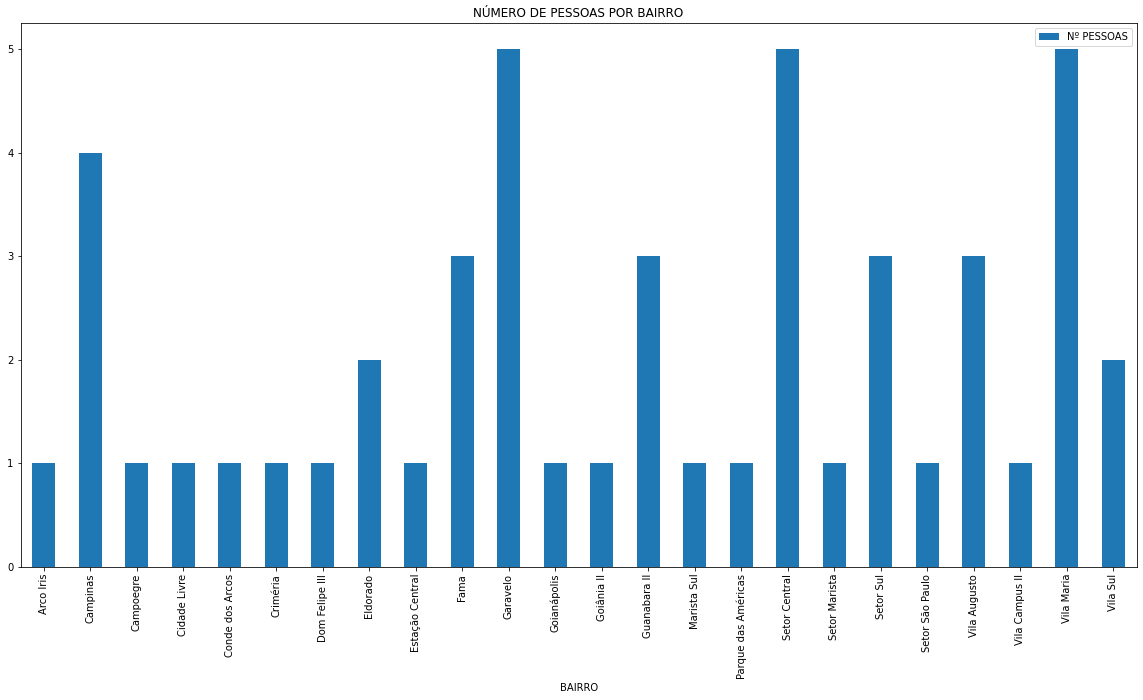

In [131]:
data = original_data.copy()
data=data.rename(columns = {'SEXO':'Nº PESSOAS'})
data = data.groupby(['BAIRRO']).aggregate({'Nº PESSOAS': 'count'})
data.reset_index(inplace=True)
data.plot.bar(x='BAIRRO', y='Nº PESSOAS', title='NÚMERO DE PESSOAS POR BAIRRO', figsize=(20,10))

###Now, let's see what is the number of men and women per neighborhood

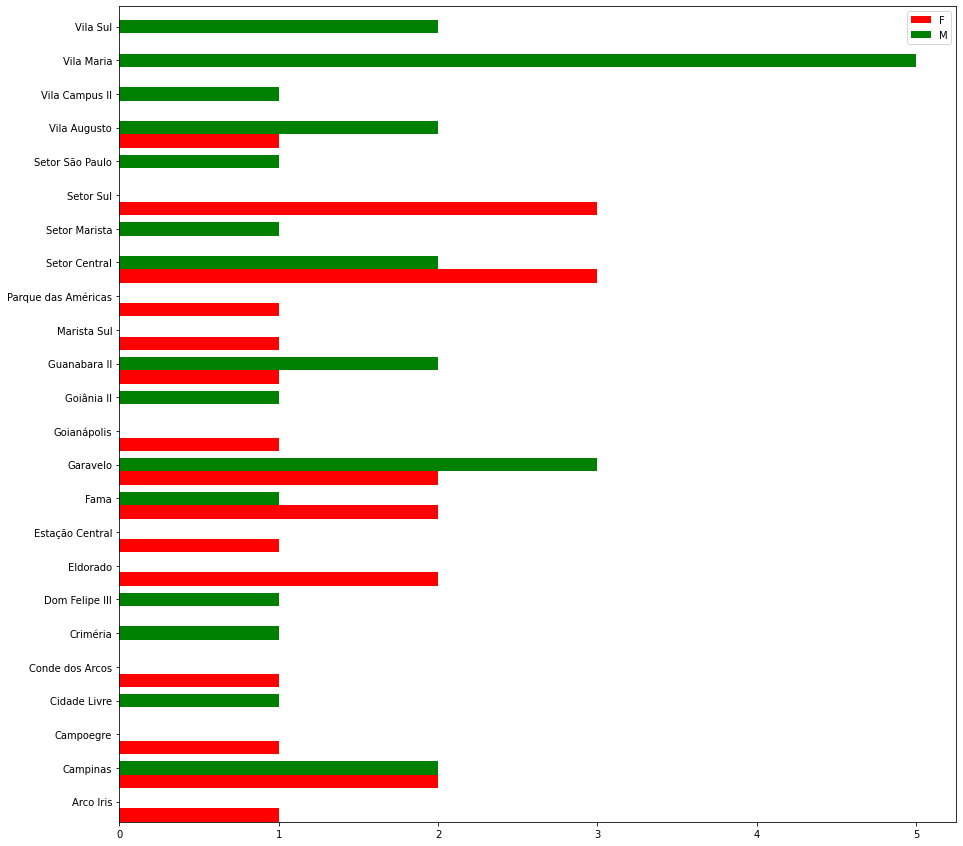

In [130]:
data = original_data.copy()
data['SEXO'] = data['SEXO'].mask(data['SEXO'].ne('M'))
menPerBairro = data.groupby(['BAIRRO'])['SEXO'].count()

data = original_data.copy()
data['SEXO'] = data['SEXO'].mask(data['SEXO'].ne('F'))
womenPerBairro = data.groupby(['BAIRRO'])['SEXO'].count()

x = womenPerBairro.index.tolist()
y1 = menPerBairro.tolist()
y2 = womenPerBairro.tolist()

df = pd.DataFrame(dict(graph=x,
                           n=y1, m=y2)) 

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(ind, df.n, width, color='red', label='F')
ax.barh(ind + width, df.m, width, color='green', label='M')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()

plt.show()

### The red dots below represent women and the blue dots men. In this scatter plot we use the symptoms in X-axis to highlight the quantity of sick people per symptoms.

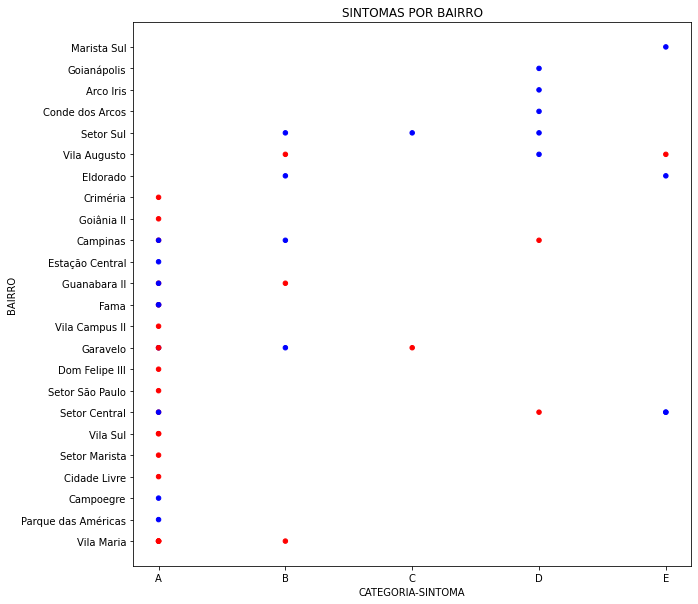

In [ ]:
data = original_data.copy()
data = data.sort_values('CATEGORIA-SINTOMA')
colors = np.where(data["SEXO"]=='M','b','r')
data.plot.scatter(x='CATEGORIA-SINTOMA', y='BAIRRO', c = colors, title='SINTOMAS POR BAIRRO', figsize=(10,10), sort_columns=True)

### The red dots below represent women and the blue dots men. In this scatter plot we use the neighborhood in X-axis to highlight the quantity of sick people per neighborhood.

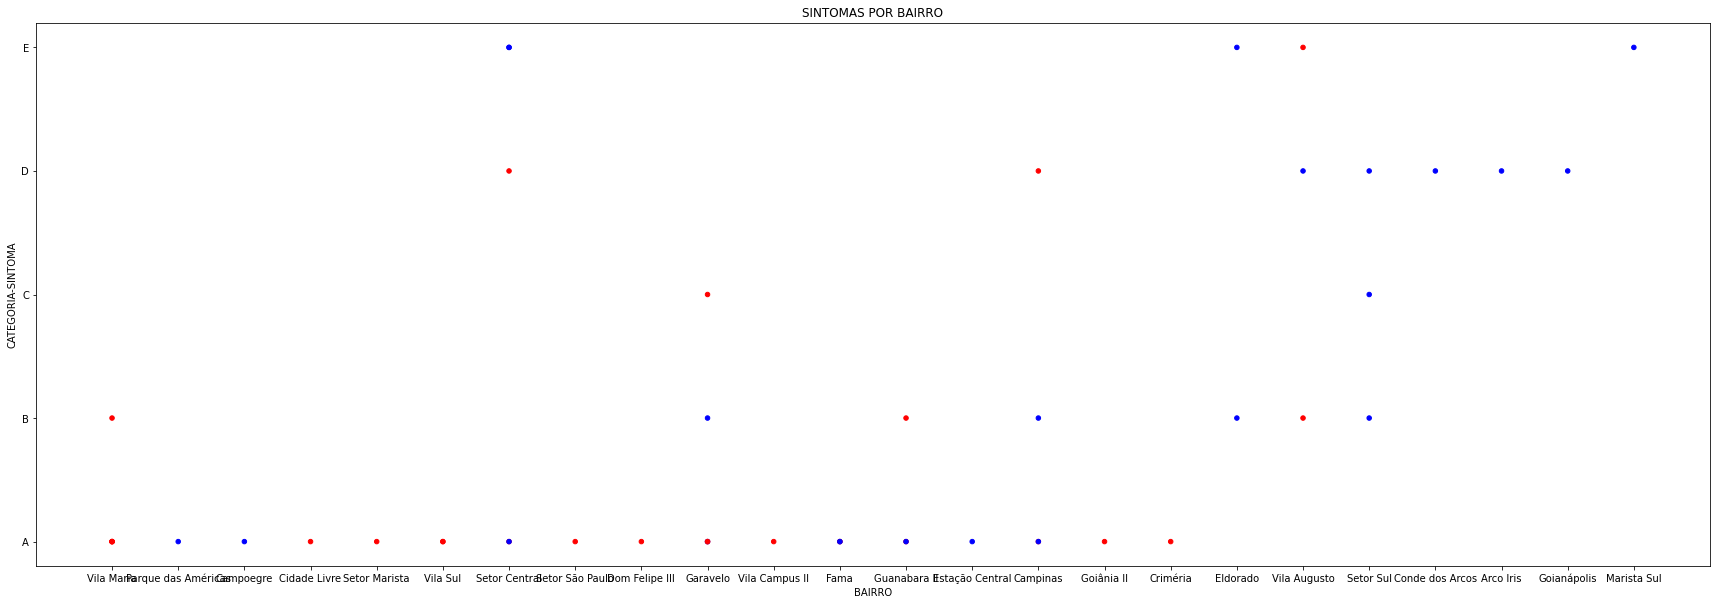

In [ ]:
data = original_data.copy()
data = data.sort_values('CATEGORIA-SINTOMA')
colors = np.where(data["SEXO"]=='M','b','r')
data.plot.scatter(x='BAIRRO', y='CATEGORIA-SINTOMA', c = colors, title='SINTOMAS POR BAIRRO', figsize=(30,10))

### The green columns below represent women and the blue ones men. In this bar plot we put the age at X-axis and weight in Y-axis. There is something interesting here, **we can see at the beginning of the figure one man with age 0 and weight above 80 and two women with age 8 and weight above 100.** 

### Therefore, we can be suspicious of our data. Let's continue our investigation

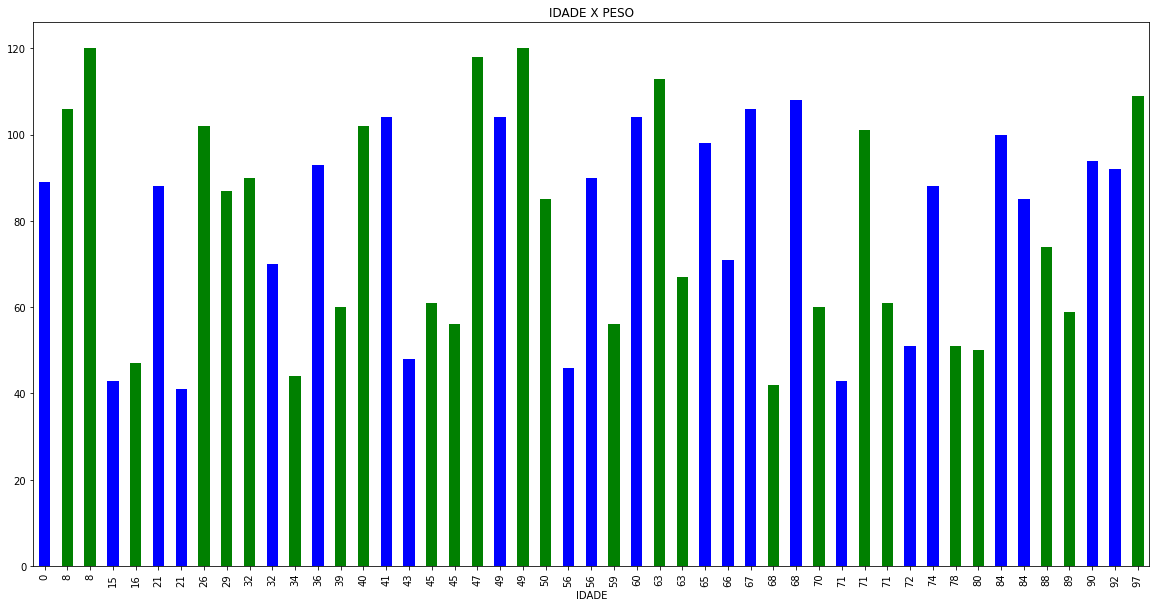

In [ ]:
data = original_data.copy()
data = data.sort_values('IDADE')
colors = np.where(data["SEXO"]=='M','b','g')
data.plot.bar(x='IDADE', y='PESO', color = colors, title='IDADE X PESO', figsize=(20,10), legend=False)

### Let's see what is the average weight per neighborhood

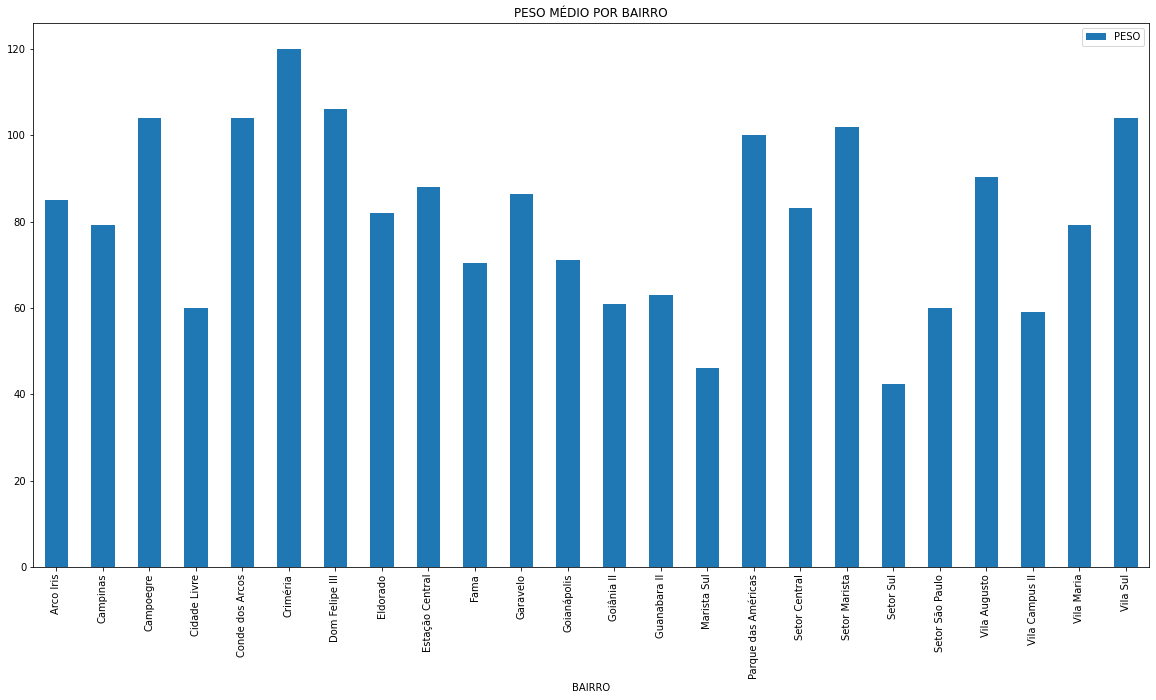

In [78]:
data = original_data.copy()
data = data.groupby(['BAIRRO']).aggregate({'PESO': 'mean'})
data.reset_index(inplace=True)
data.plot.bar(x='BAIRRO', y='PESO', title='PESO MÉDIO POR BAIRRO', figsize=(20,10))